        word     label
0    amazing  positive
1    awesome  positive
2  beautiful  positive
3  brilliant  positive
4       calm  positive
Model training completed!
Accuracy: 0.5079365079365079

Input: awesome amazing good
Predicted Sentiment: positive
Prediction Probabilities: [0.1153586 0.8846414]


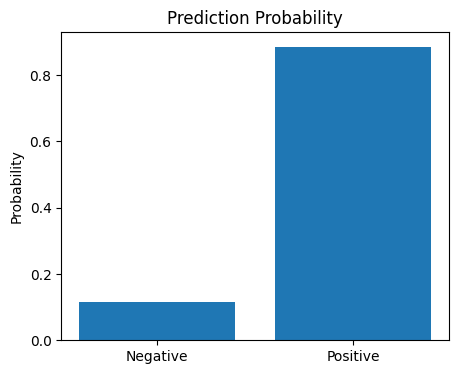

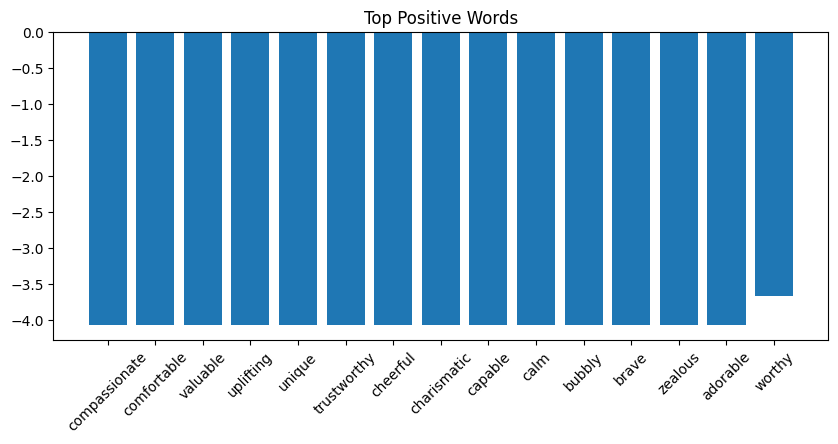

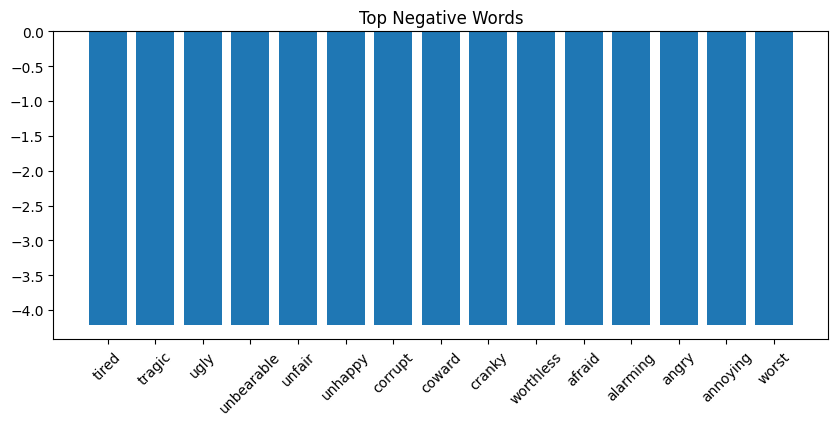

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split


df = pd.read_csv("sentiment_words_300.csv")


print(df.head())


texts = df["word"].astype(str)
labels = df["label"].astype(str)

vectorizer = CountVectorizer(binary=True)
X = vectorizer.fit_transform(texts)
y = labels


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = BernoulliNB()
model.fit(X_train, y_train)

print("Model training completed!")
print("Accuracy:", model.score(X_test, y_test))


user_input = "awesome amazing good"
x_test = vectorizer.transform([user_input])
prediction = model.predict(x_test)[0]
probabilities = model.predict_proba(x_test)[0]

print("\nInput:", user_input)
print("Predicted Sentiment:", prediction)
print("Prediction Probabilities:", probabilities)

words = vectorizer.get_feature_names_out()
log_probs = model.feature_log_prob_

top_positive_idx = np.argsort(log_probs[1])[-15:]
top_negative_idx = np.argsort(log_probs[0])[-15:]

top_positive = words[top_positive_idx]
top_negative = words[top_negative_idx]

plt.figure(figsize=(5,4))
plt.bar(["Negative", "Positive"], probabilities)
plt.title("Prediction Probability")
plt.ylabel("Probability")
plt.show()


plt.figure(figsize=(10,4))
plt.bar(top_positive, log_probs[1][top_positive_idx])
plt.title("Top Positive Words")
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(10,4))
plt.bar(top_negative, log_probs[0][top_negative_idx])
plt.title("Top Negative Words")
plt.xticks(rotation=45)
plt.show()
